In [36]:
import pandas as pd
from lightgbm import LGBMClassifier

In [37]:
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')


from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report


In [38]:
train_df = pd.read_csv("state-farm-data/clean_train_df.csv", index_col=0)
train_df

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,...,u170,u171,u172,u173,u174,u175,u176,u177,u178,y
0,-1.012346,-0.900033,0.519342,-0.821246,-0.866901,0.451852,0.111726,-0.274356,0.492414,0.638013,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,-0.162244,-0.735236,0.715079,0.559103,-0.417889,0.466667,0.608435,0.408109,0.670805,-1.056712,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.579398,-0.378272,0.069265,0.220299,0.382684,-0.066667,0.485687,-0.689876,-1.246702,-0.307387,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.391899,-0.048420,0.850826,-0.157162,-0.454669,-0.429630,-0.267347,-0.270695,1.248258,-0.238055,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,-0.002648,1.015934,1.643770,0.047496,0.748437,0.800000,-0.375713,-0.139465,-0.548114,-0.612883,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-0.478944,-0.174643,0.382790,-0.507692,0.327572,-0.637037,1.115233,0.282738,-0.870188,-0.344191,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
39996,-0.435919,-1.328956,-1.294070,0.701431,0.249759,0.562963,-0.025989,0.599330,0.705442,1.046560,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
39997,-0.437619,-1.009004,-0.281923,0.000000,0.250540,-1.607407,0.461313,0.191651,-0.185514,0.526075,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
39998,0.406156,0.129344,0.206677,0.027358,0.988114,0.000000,-0.206261,-1.104236,-0.709088,-0.444112,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [39]:
y = train_df.pop('y')
y

0        0
1        1
2        1
3        0
4        0
        ..
39995    0
39996    0
39997    0
39998    0
39999    0
Name: y, Length: 40000, dtype: int64

In [40]:
#split x and y data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=1123)

In [51]:
lgb_classifier = LGBMClassifier(n_estimators=120, colsample_bytree=0.6, subsample=0.8, subsample_freq=1, is_unbalance=True)

In [52]:
cv = StratifiedKFold(10)

In [53]:
estimator = cross_validate(estimator=lgb_classifier, X=X_train, y=y_train, cv=cv, scoring='roc_auc', return_estimator=True)

Text(0.5, 1.0, 'AUC Scores Across CV')

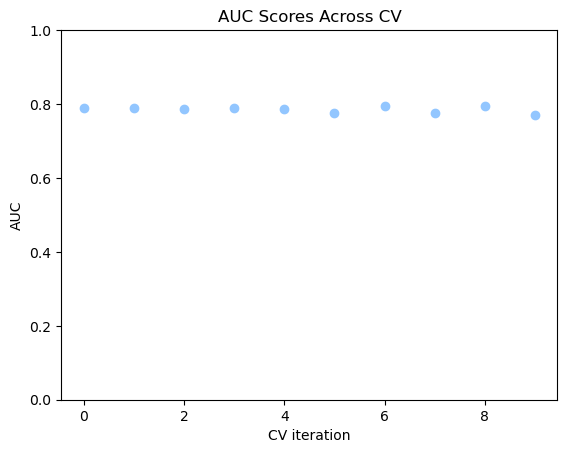

In [54]:
plt.scatter(range(10), estimator['test_score'])
plt.ylim(0, 1)
plt.ylabel("AUC")
plt.xlabel("CV iteration")
plt.title("AUC Scores Across CV")

In [55]:
from sklearn.ensemble import StackingClassifier


__estimators = [(f'lgb_{i}', est) for i,est in enumerate(estimator['estimator'])]

stacked_est = StackingClassifier(estimators=__estimators, cv='prefit', stack_method='predict_proba', passthrough=False)
stacked_est.fit(X_train, y_train)

StackingClassifier(cv='prefit',
                   estimators=[('lgb_0',
                                LGBMClassifier(colsample_bytree=0.6,
                                               is_unbalance=True,
                                               n_estimators=120, subsample=0.8,
                                               subsample_freq=1)),
                               ('lgb_1',
                                LGBMClassifier(colsample_bytree=0.6,
                                               is_unbalance=True,
                                               n_estimators=120, subsample=0.8,
                                               subsample_freq=1)),
                               ('lgb_2',
                                LGBMClassifier(colsample_bytree=0.6,
                                               is_unbalance=True,
                                               n_estimators=120, s...
                                LGBMClassifier(colsample_bytree=0.6,
                                               is_unbalance=True,
                                               n_estimators=120, subsample=0.8,
                                               subsample_freq=1)),
                               ('lgb_8',
                                LGBMClassifier(colsample_bytree=0.6,
                                               is_unbalance=True,
                                               n_estimators=120, subsample=0.8,
                                               subsample_freq=1)),
                               ('lgb_9',
                                LGBMClassifier(colsample_bytree=0.6,
                                               is_unbalance=True,
                                               n_estimators=120, subsample=0.8,
                                               subsample_freq=1))],
                   stack_method='predict_proba')

In [56]:
y_test_pred = stacked_est.predict(X_test)
y_test_proba = stacked_est.predict_proba(X_test)

In [57]:
y_test_proba

array([[0.99810352, 0.00189648],
       [0.20012026, 0.79987974],
       [0.99755372, 0.00244628],
       ...,
       [0.95621379, 0.04378621],
       [0.91580502, 0.08419498],
       [0.99403736, 0.00596264]])

In [58]:
#Generate predicted probabilites
print('AUC: ', roc_auc_score(y_test, y_test_proba[:,1]))
print('Accuracy: ', stacked_est.score(X_test, y_test))

AUC:  0.8058630376076521
Accuracy:  0.8495


In [59]:
cr = classification_report(y_true=y_test, y_pred=y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6836
           1       0.48      0.35      0.41      1164

    accuracy                           0.85      8000
   macro avg       0.69      0.64      0.66      8000
weighted avg       0.83      0.85      0.84      8000



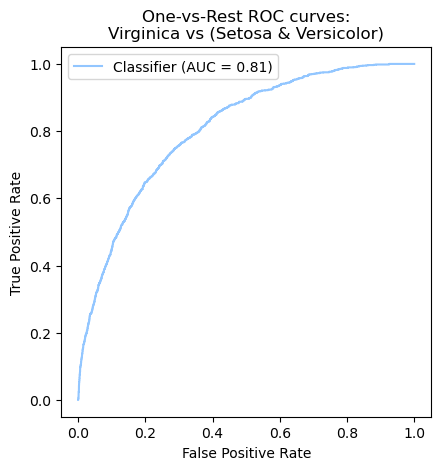

In [60]:
RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba[:, 1],
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()